# 1 - Perkenalan

>Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai

- Nama : Efitri Apriliyan


- Batch : 015 - RMT


- Dataset : https://www.kaggle.com/datasets/blastchar/telco-customer-churn


- Objective : Memprediksi Customer Churn pada Perusahaan Telekomunikasi

# 2 - Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [ ]:
# Import Libraries

import pandas as pd
import numpy as np

#for graphic plot
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer

#for sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#for functional model
from tensorflow.keras.layers import Input
from tensorflow.keras import Model

#for metrics and save model
from sklearn.metrics import classification_report
import tensorflow as tf
import joblib
import json
import warnings
warnings.simplefilter("ignore")

In [ ]:
# Untuk menghandle outlier
!pip install feature-engine

from feature_engine.outliers import Winsorizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 276 kB 8.2 MB/s 


# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.


In [ ]:
# Mengeload data
df = pd.read_csv('h8dsft_Milestone1P2_Efitri_Apriliyan.csv')
df.head() # data awal

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
# data akhir
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [ ]:
#mengkopi dataset
df_copy=df.copy()

In [ ]:
#mengecek data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Terdapat 7043 baris data dengan total 21 kolom. Terdapat 1 kolom dengan tipe float, 2 kolm tipe integer dan 18 kolom tipe object.

In [ ]:
#change `TotalCharges` data type to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
##change `SeniorCitizen` data type to object
df["SeniorCitizen"] = df["SeniorCitizen"].astype('object')


In [ ]:
#mengecek data setelah mengubah tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

In [ ]:
#Menampilkan jenis klasifikasi pada kolom `Churn`
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
#Melihat jumlah masing-masing jenis pada kolom `Churn`
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

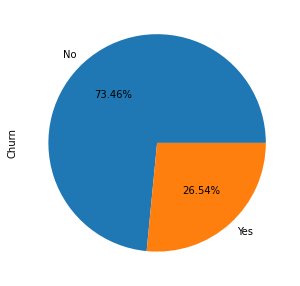

In [ ]:
#plot `Churn` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['Churn'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

Terdapat 1.869 (26.54%) pelanggan churn dan 5.174 (73.46%) pelanggan tidak churn.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `gender`
df['gender'].nunique()

2

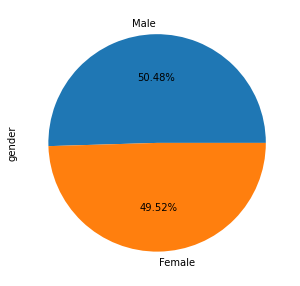

In [ ]:
#plot `gender` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['gender'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

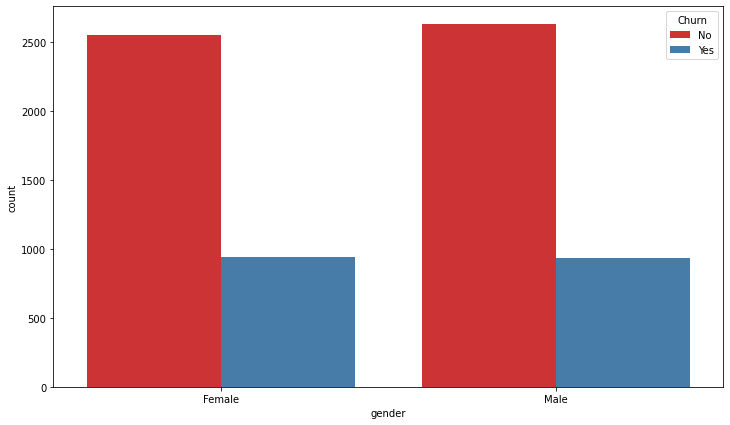

In [ ]:
# melihat hubungan gender terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('gender', hue= 'Churn', data=df, palette='Set1')

plt.show()

Jumlah gender female dan male hampir sama yaitu 50.48% male dan 49.52% female. Keduanya tidak berbeda signifikan terhadap Churn.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `SeniorCitizen`
df['SeniorCitizen'].unique()

array([0, 1], dtype=object)

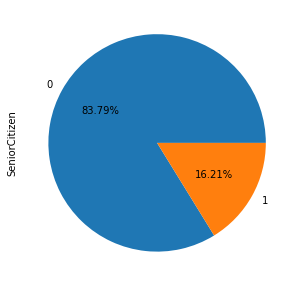

In [ ]:
#plot `SeniorCitizen` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['SeniorCitizen'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

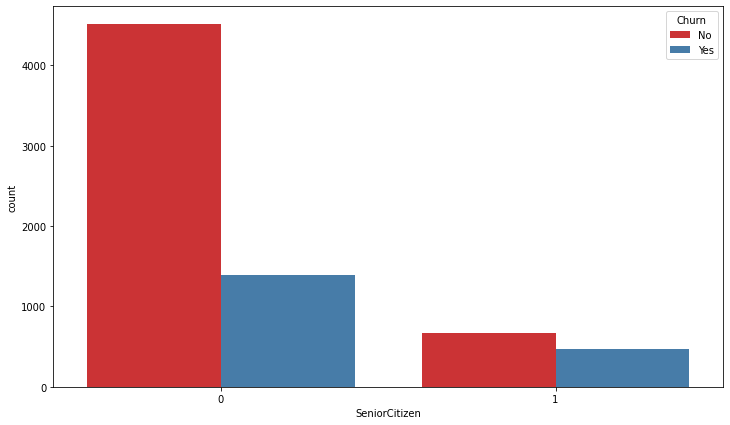

In [ ]:
# melihat hubungan SeniorCitizen terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('SeniorCitizen', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Terdapat 16.21% Senior Citizen dan 83.79% bukan Senior Citizen. 
- Dari grafik histogram terlihat bahwa Senior Citizen lebih banyak melakukan Churn dibandingkan yang bukan Senior Citizen, karena dari histogram terlihat perbandingan jumlah Senior Citizen terhadap jumlah Churn tidak berbeda jauh. Sedangkan, pada yang bukan Senior Citizen, terdapat perbedaan yang signifikan dengan jumlah customer Churn.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `Partner`
df['Partner'].unique()

array(['Yes', 'No'], dtype=object)

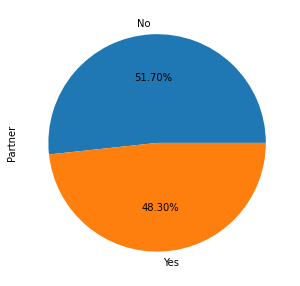

In [ ]:
#plot `Partner` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['Partner'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

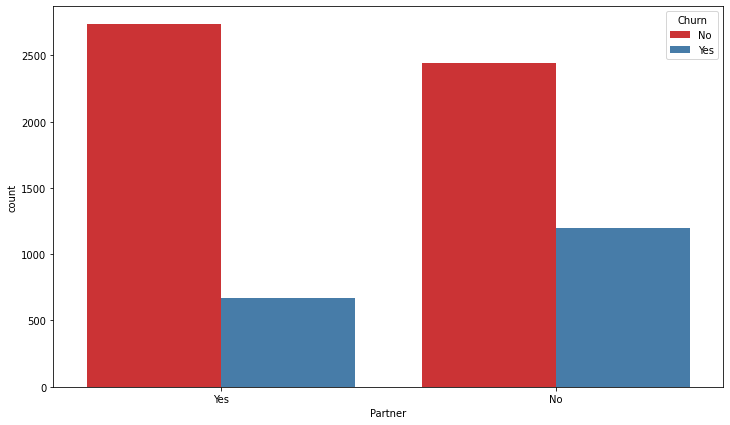

In [ ]:
# melihat hubungan Partner terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('Partner', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Terlihat bahwa jumlah customer yang memiliki partner adalah sebesar 48.30% dan yang tidak memiliki partner sebesar 51.70%.
- Dari grafik histogram terlihat bahwa customer yang tidak memiliki partner lebih banyak melakukan Churn, dibandingkan dengan customer yang memiliki partner.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `Dependents`
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

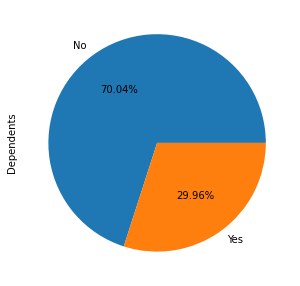

In [ ]:
#plot `Dependents` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['Dependents'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

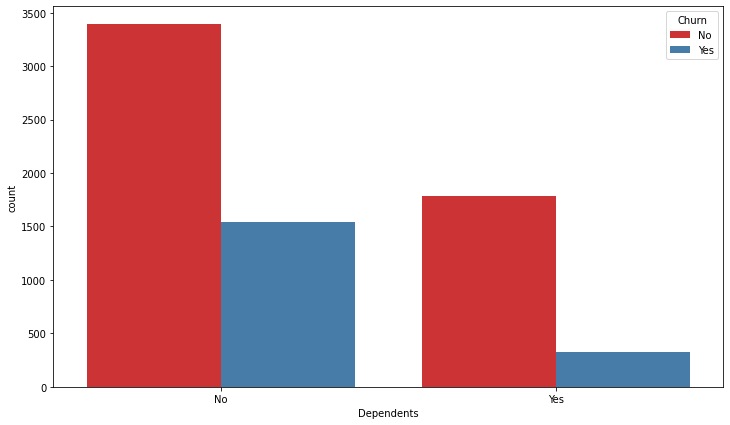

In [ ]:
# melihat hubungan Dependents terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('Dependents', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Terlihat bahwa jumlah customer yang memiliki dependents adalah sebesar 29.96% dan yang tidak memiliki dependents sebesar 70.04%.
- Dari grafik histogram terlihat bahwa customer yang tidak memiliki dependents lebih banyak melakukan Churn, dibandingkan dengan customer yang memiliki dependents.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `PhoneService`
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

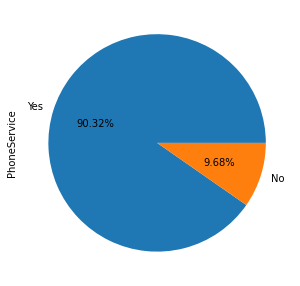

In [ ]:
#plot `PhoneService` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['PhoneService'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

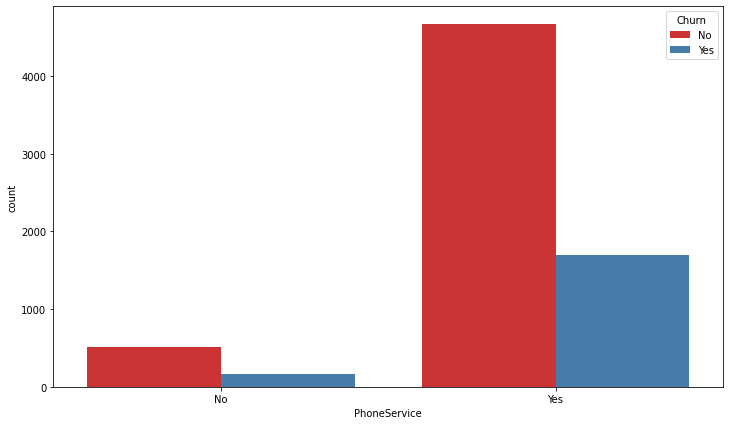

In [ ]:
# melihat hubungan PhoneService terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('PhoneService', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Terlihat bahwa jumlah customer yang memiliki PhoneService adalah sebesar 90.32% dan yang tidak memiliki PhoneService sebesar 9.68%
- Dari grafik histogram terlihat bahwa customer yang memiliki PhoneService lebih banyak melakukan Churn, hal ini berbanding lurus dengan banyaknya jumlah customer yang memiliki PhoneService.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `MultipleLines`
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

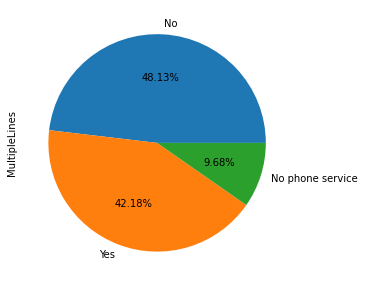

In [ ]:
#plot `MultipleLines` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['MultipleLines'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

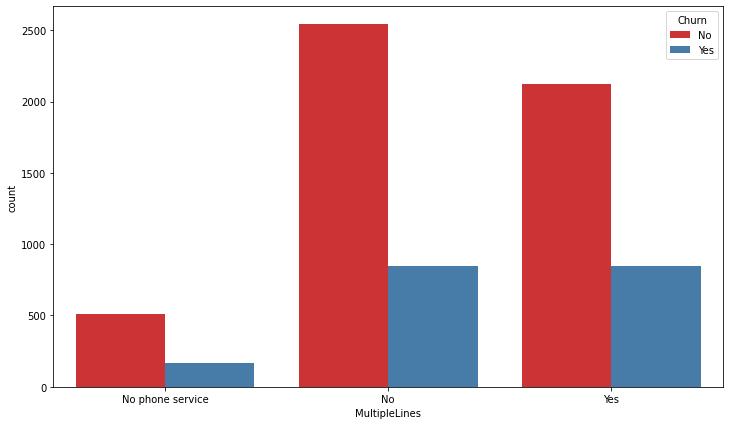

In [ ]:
# melihat hubungan MultipleLines terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('MultipleLines', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Jumlah customer dengan MultipleLines adalah sebesar 42.18%, customer yang tidak memiliki MultipleLines sebesar 48.13% dan sebesar 9.68% adalah customer yang tidak memiliki Phone Service.
- Terlihat bahwa karakteristik customer MultipleLines berbanding lurus dengan customer yang Churn, yaitu semakin banyak jumlah customer yang tidak memiliki MultipleLines, maka semakin banyak juga yang Churn dibandingkan dengan cutomer yang memiliki MultipleLines.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `InternetService`
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

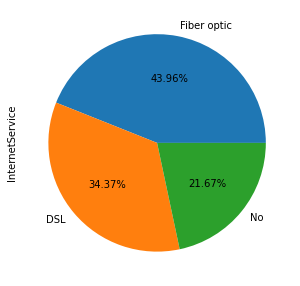

In [ ]:
#plot `InternetService` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['InternetService'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

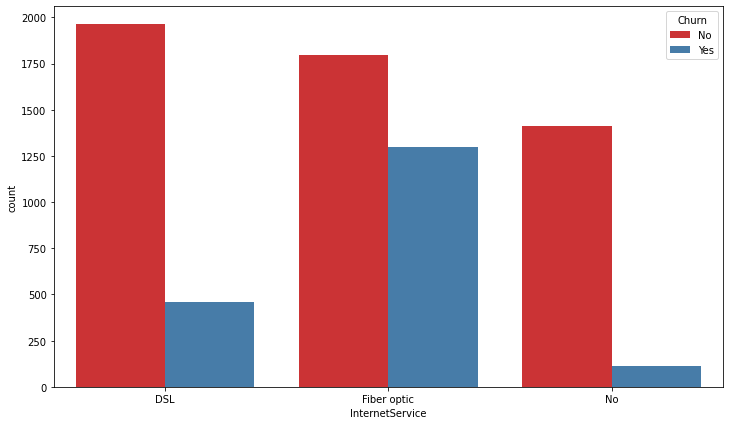

In [ ]:
# melihat hubungan InternetService terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('InternetService', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Terdapat 43.96% customer menggunakan saluran fiber optic, 34.37% customer menggunakan DSL dan 21.67% tidak memiliki internet service.
- Dari grafik histogram terlihat bahwa customer yang melakukan churn terbanyak adalah customer yang menggunakan Fiber Optic Internet Service dibandingkan dengan DSL dan tanpa internet service.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `OnlineSecurity`
df['OnlineSecurity'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

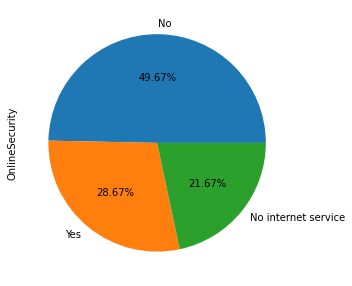

In [ ]:
#plot `OnlineSecurity` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['OnlineSecurity'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

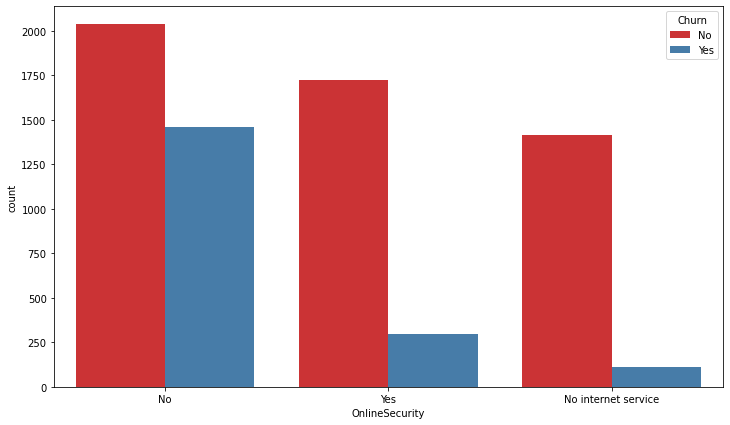

In [ ]:
# melihat hubungan OnlineSecurity terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('OnlineSecurity', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Terdapat 49.67% customer tanpa Online Security, 28.67% customer dengan online security dan 21.67% customer tanpa internet service.
- Churn terbanyak dilakukan oleh customer tanpa Online Security.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `OnlineBackup`
df['OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

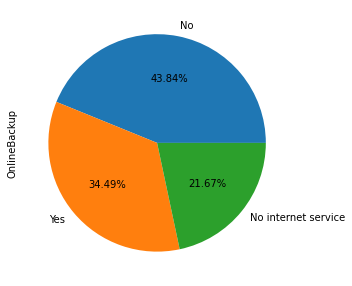

In [ ]:
#plot `OnlineBackup` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['OnlineBackup'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

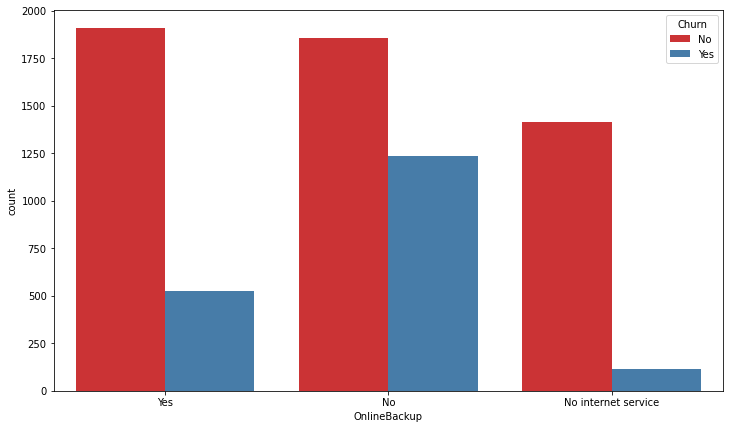

In [ ]:
# melihat hubungan OnlineBackup terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('OnlineBackup', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Sebesar 43.84% customer tidak memiliki online backup, 34.49% customer memiliki online backup dan 21.67% customer tanpa internet service.
- Churn terbanyak dilakukan oleh customer tanpa Online Backup.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `DeviceProtection`
df['DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

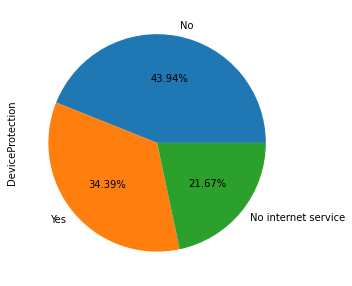

In [ ]:
#plot `DeviceProtection` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['DeviceProtection'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

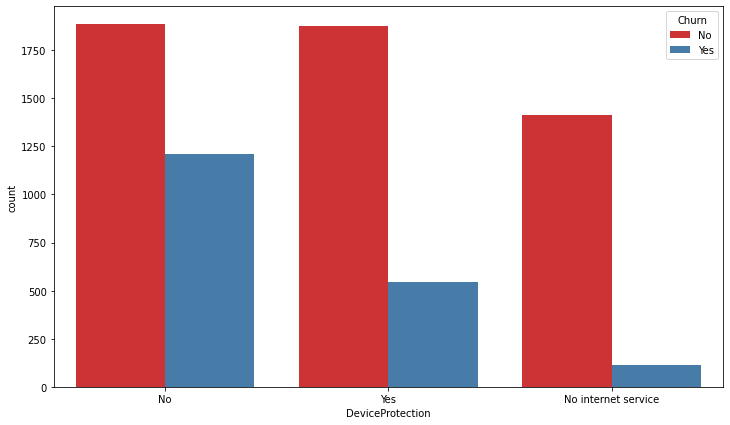

In [ ]:
# melihat hubungan DeviceProtection terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('DeviceProtection', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Sebesar 43.94% customer tanpa Device Protection, 34.39% customer dengan Device Protection dan 21.67% tanpa internet service.
- Berdasarkan histogram di atas, customer yang melakukan churn terbanyak adalah customer tanpa Device Protection.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `TechSupport`
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

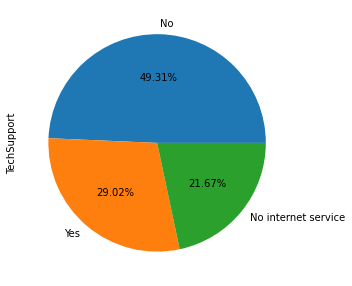

In [ ]:
#plot `TechSupport` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['TechSupport'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

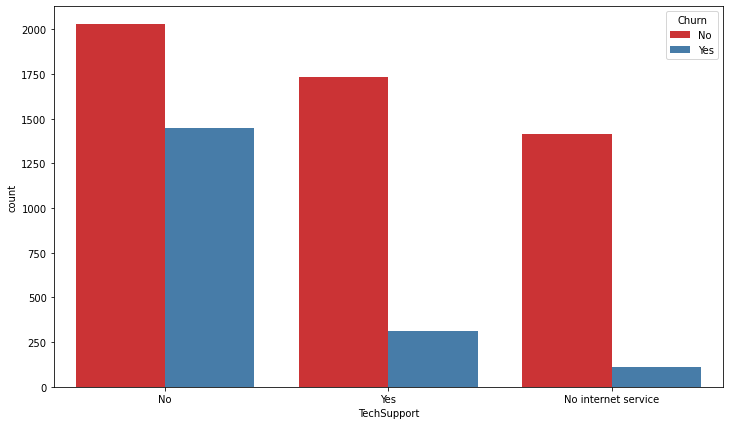

In [ ]:
# melihat hubungan TechSupport terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('TechSupport', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Sebesar 49.31% customer tidak memiliki Tech Support, 29.02% customer memiliki Tech Support dan 21.67% customer tanpa internet service.
- Churn terbanyak dilakukan oleh customer tanpa Tech Support.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `StreamingTV`
df['StreamingTV'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

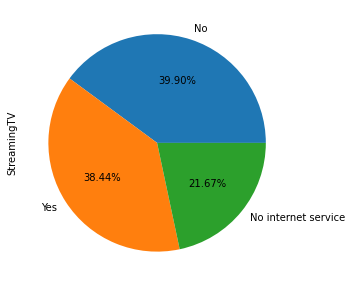

In [ ]:
#plot `StreamingTV` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['StreamingTV'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

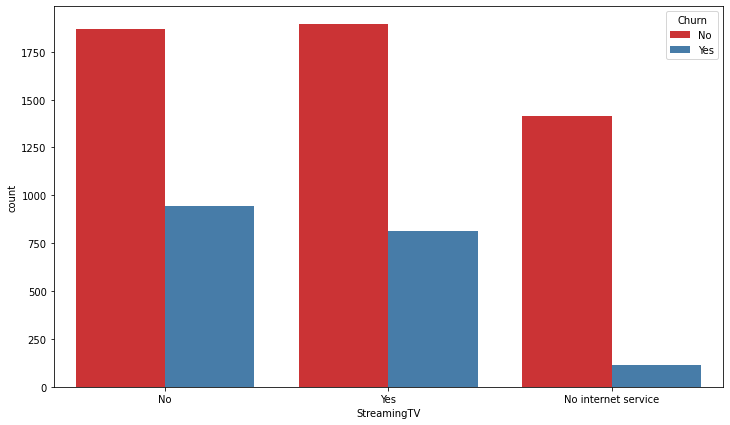

In [ ]:
# melihat hubungan StreamingTV terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('StreamingTV', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Sebesar 39.90% customer tidak berlangganan Streaming TV, 38.44% customer berlangganan Streaming TV dan 21.67% customer tidak berlangganan internet.
- Churn terbanyak dilakukan oleh customer yang tidak berlangganan Streaming TV.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `StreamingMovies`
df['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

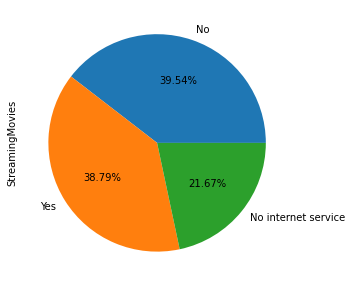

In [ ]:
#plot `StreamingMovies` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['StreamingMovies'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

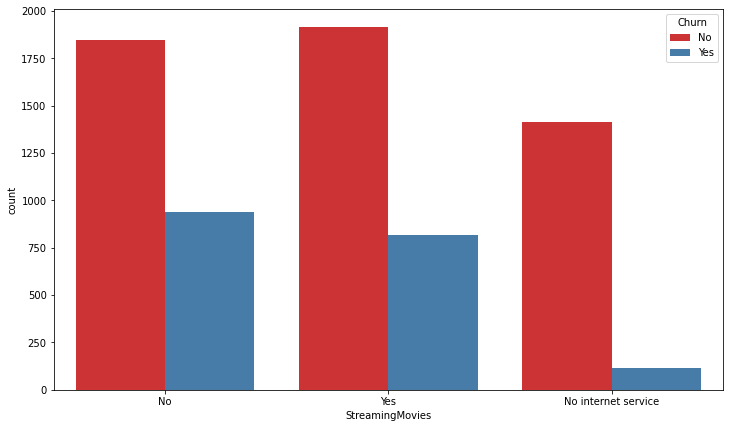

In [ ]:
# melihat hubungan StreamingMovies terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('StreamingMovies', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Sebesar 39.54% customer tidak berlangganan Streaming Movies, 38.79% customer berlangganan streaming movies dan 21.67% customer tidak memiliki internet service.
- Churn terbanyak dilakukan oleh customer yang tidak berlangganan Streaming Movies.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `Contract`
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

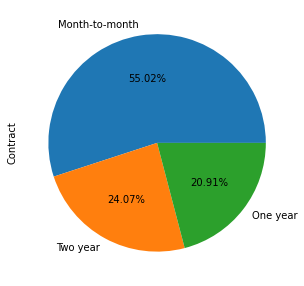

In [ ]:
#plot `Contract` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['Contract'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

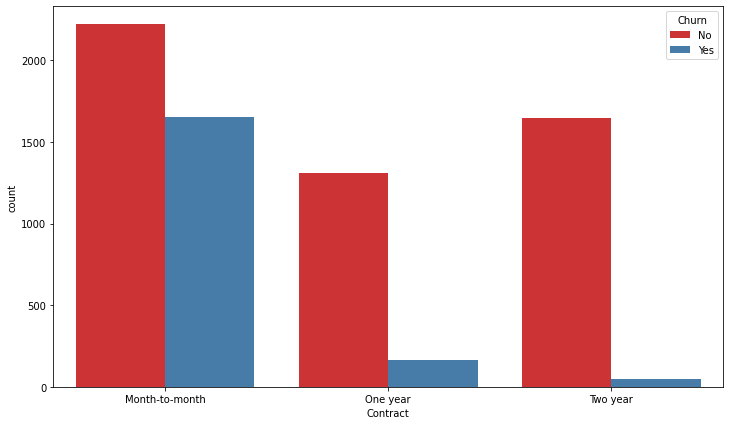

In [ ]:
# melihat hubungan Contract terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('Contract', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Sebesar 55.02% customer berlangganan bulanan, 24.07% customer berlangganan 2 tahunan dan 20.91% customer berlangganan satu tahunan.
- Customer yang paling banyak melakukan churn adalah customer yang berlangganan bulanan.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `PaperlessBilling`
df['PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

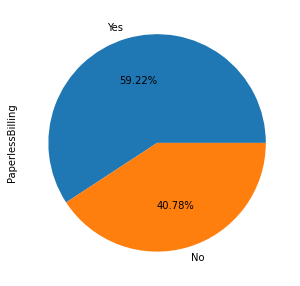

In [ ]:
#plot `PaperlessBilling` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['PaperlessBilling'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

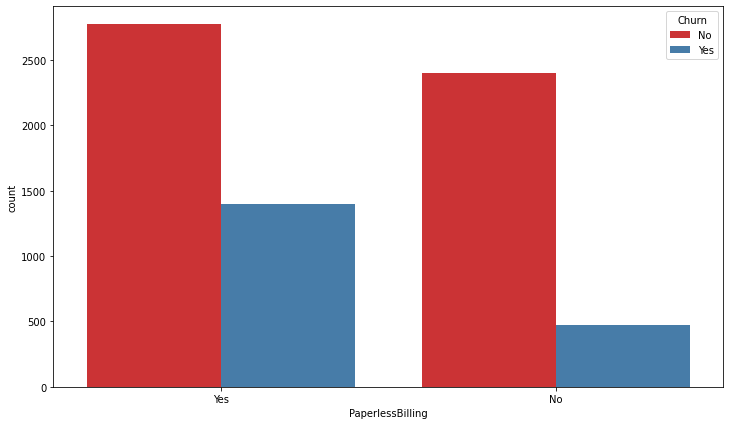

In [ ]:
# melihat hubungan PaperlessBilling terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('PaperlessBilling', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Sebanyak 59.22% customer berlangganan tanpa tagihan dalam kertas (Paperless Billing) dan 40.87% customer berlangganan dengan tagihan dalam kertas.
- Churn terbanyak dilakukan oleh customer yang berlangganan dengan tagihan tanpa kertas.

In [ ]:
##Menampilkan jenis klasifikasi pada kolom `PaymentMethod`
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

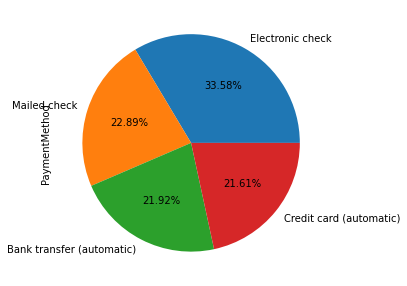

In [ ]:
#plot `PaymentMethod` menggunakan pie chart untuk melihat perbandingan dalam persen.
df['PaymentMethod'].value_counts().plot(kind='pie', figsize=(10,5), autopct='%.2f%%')

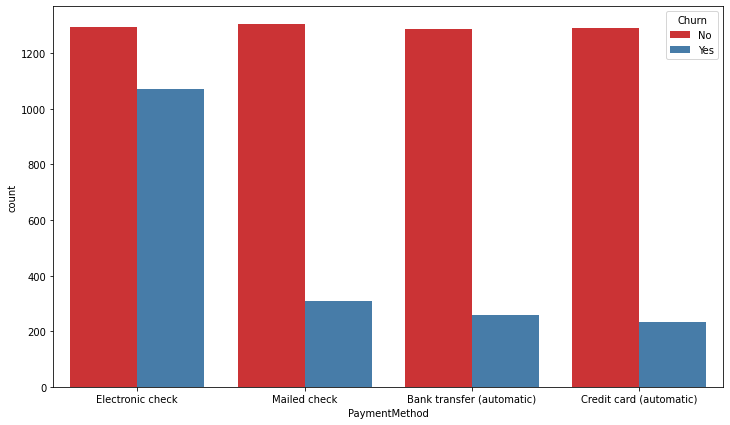

In [ ]:
# melihat hubungan PaymentMethod terhadap churn
plt.figure(figsize=(12,7))
sns.countplot('PaymentMethod', hue= 'Churn', data=df, palette='Set1')

plt.show()

- Sebanyak 33.58% cusatomer membayar dengan Electronic Check, 22.89% customer membayar melalui Mailed Check, 21.92% customer membayar dengan Bank Transfer dan 21.61% membayar dengan Credit Card.
- Churn terbanyak dilakukan oleh customer dengan metode pembayaran Electronic Check, lalu yang kedua adalah Mailed Check, yang ketiga adalah bank transfer dan yang terakhir melalui credit card.

In [ ]:
#Melihat isi tenure
df['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

Text(0.5, 1.0, 'Histogram of tenure')

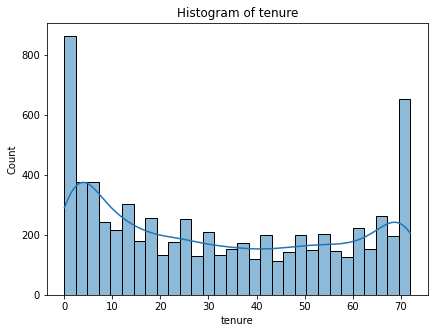

In [ ]:
# Distribusi tenure
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(df['tenure'], bins=30, kde=True)
plt.title('Histogram of tenure')

In [ ]:
df['MonthlyCharges'].unique()

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

Text(0.5, 1.0, 'Histogram of bmi')

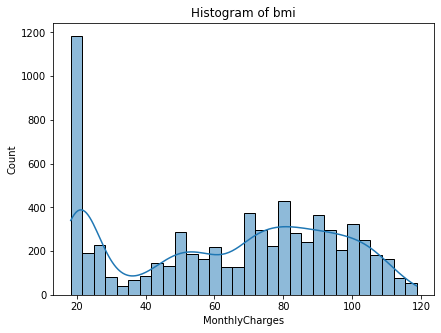

In [ ]:
# Distribusi MonthlyCharges
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], bins=30, kde=True)
plt.title('Histogram of bmi')

In [ ]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

Text(0.5, 1.0, 'Histogram of bmi')

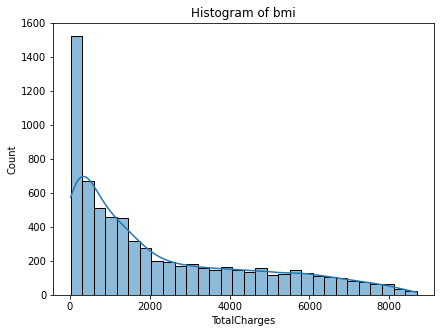

In [ ]:
# Distribusi TotalCharges
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.histplot(df['TotalCharges'], bins=30, kde=True)
plt.title('Histogram of bmi')

# 5 - Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [ ]:
# Get Data for Model Inference

data_inf = df.sample(10, random_state=3)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
808,4289-DTDKW,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.10,Yes
1496,3195-TQDZX,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No
4326,1455-ESIQH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.10,Yes
492,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
4445,3134-DSHVC,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No
1934,4587-NUKOX,Female,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.10,246.50,Yes
1166,7129-ACFOG,Female,0,No,No,5,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No
1278,4730-AWNAU,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No
591,5512-IDZEI,Male,0,Yes,Yes,46,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1174.80,No


In [ ]:
# Remove Inference Set from Dataset
data_train_test = df.drop(data_inf.index)
data_train_test

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
# Reset Index

data_train_test.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4289-DTDKW,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.10,Yes
1,3195-TQDZX,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No
2,1455-ESIQH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.10,Yes
3,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
4,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
5,3134-DSHVC,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No
6,4587-NUKOX,Female,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.10,246.50,Yes
7,7129-ACFOG,Female,0,No,No,5,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No
8,4730-AWNAU,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No
9,5512-IDZEI,Male,0,Yes,Yes,46,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1174.80,No


##Splitting between X and y

In [ ]:
# Splitting between X and y

X= data_train_test.drop('Churn', axis=1)
y= data_train_test['Churn']

In [ ]:
# Split between Train-set, Val-Set and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=3)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=1)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (5081, 20)
Val Size :  (897, 20)
Test Size :  (1055, 20)


## Handling Missing Values

In [ ]:
X_train.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        7
dtype: int64

In [ ]:
X_val.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

In [ ]:
X_test.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        2
dtype: int64

Terdapat 7 missing values pada data X_train, 2 missing values pada data X_val dan 2 missing values pada data X_test yang selanjutnya akan kita handle menggunakan pipeline.

## Handling Outliers

In [ ]:
# Fungsi untuk membuat histogram dan boxplot.
# Fungsi ini mengambil dataframe (df) dan variable yang akan dilihat distribusinya

def diagnostic_plots(X_train, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=X_train[variable])
    plt.title('Boxplot')

    plt.show()

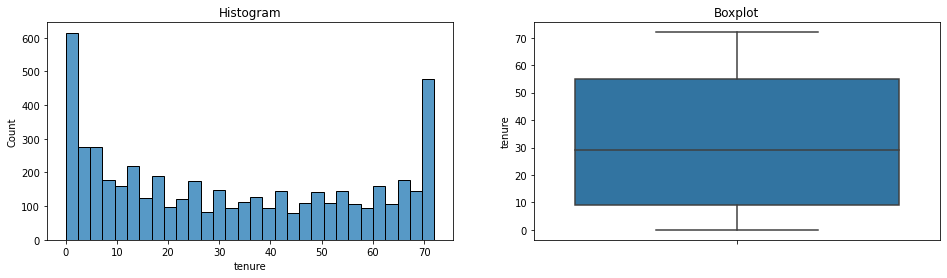


Skewness Value :  0.237737812746024


In [ ]:
# variabel yang digunakan adalah 'tenure' dari data X_train

diagnostic_plots(X_train, 'tenure')
print('\nSkewness Value : ', X_train['tenure'].skew())

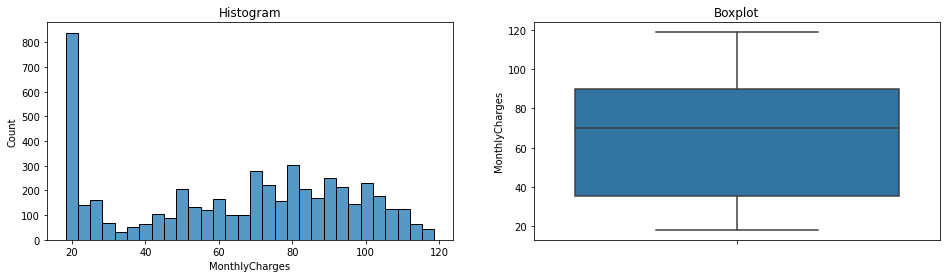


Skewness Value :  -0.21197090011730402


In [ ]:
# variabel yang digunakan adalah 'MonthlyCharges' dari data X_train

diagnostic_plots(X_train, 'MonthlyCharges')
print('\nSkewness Value : ', X_train['MonthlyCharges'].skew())

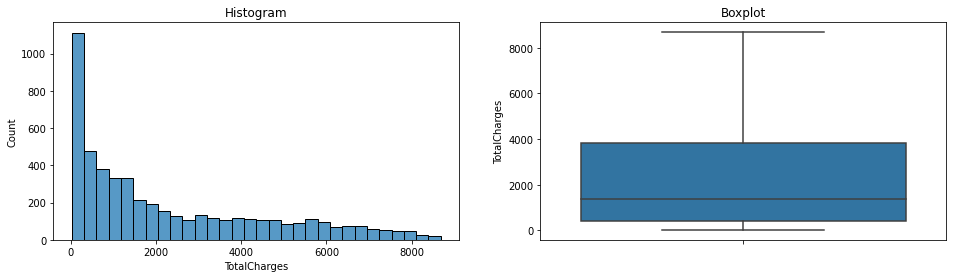


Skewness Value :  0.9639181807686902


In [ ]:
# variabel yang digunakan adalah 'TotalCharges' dari data X_train

diagnostic_plots(X_train, 'TotalCharges')
print('\nSkewness Value : ', X_train['TotalCharges'].skew())

Tidak terdapat outlier pada masing-masing boxplot tersebut.

## Feature Selection

In [ ]:
# Drop Columns `customerID`

X_train.drop(['customerID'], axis = 1, inplace=True)
X_val.drop(['customerID'], axis = 1, inplace=True)
X_test.drop(['customerID'], axis = 1, inplace=True)
X_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3203,Female,0,No,No,17,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),20.05,337.90
1033,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),114.70,7849.85
280,Female,0,No,No,6,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,No,Mailed check,55.15,322.90
520,Male,1,Yes,No,29,Yes,Yes,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,51.60,1442.00
2932,Male,1,No,No,53,No,No phone service,DSL,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,54.45,2854.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,Female,0,No,No,26,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),100.50,2599.95
639,Female,0,Yes,Yes,43,Yes,No,DSL,No,No,No,No,Yes,No,Month-to-month,No,Electronic check,56.15,2499.30
3212,Male,0,Yes,No,70,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),77.30,5498.20
6614,Male,0,Yes,Yes,64,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),60.05,3845.45


In [ ]:
# melihat jumlah data X_train
X_train.shape

(5081, 19)

In [ ]:
#memberi label pada target untuk melihat korelasinya terhadap variabel
cat1 = ['Churn']

In [ ]:
y_train1=pd.get_dummies(y_train, columns=cat1)

In [ ]:
#target sudah terlabel
y_train1

,No,Yes
3203,1,0
1033,1,0
280,1,0
520,1,0
2932,0,1
...,...,...
3830,1,0
639,0,1
3212,1,0
6614,1,0


In [ ]:
#future importance
cat = ['gender', 'Dependents','Partner','Partner','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
X_train1= pd.get_dummies(X_train, columns=cat, drop_first=True)
X_train1

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Dependents_Yes,Partner_Yes,Partner_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3203,0,17,20.05,337.90,0,0,0,0,1,0,...,1,0,1,0,1,0,0,1,0,0
1033,0,68,114.70,7849.85,1,1,1,1,1,0,...,0,1,0,1,0,1,1,0,0,0
280,0,6,55.15,322.90,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
520,1,29,51.60,1442.00,1,0,1,1,1,0,...,0,0,0,0,0,0,1,0,1,0
2932,1,53,54.45,2854.55,1,0,0,0,0,1,...,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,0,26,100.50,2599.95,0,0,0,0,1,0,...,0,1,0,1,0,0,1,0,0,0
639,0,43,56.15,2499.30,0,1,1,1,1,0,...,0,1,0,0,0,0,0,0,1,0
3212,0,70,77.30,5498.20,1,0,1,1,1,0,...,0,0,0,1,0,1,0,1,0,0
6614,0,64,60.05,3845.45,1,1,1,1,0,1,...,0,1,0,1,0,1,1,0,0,0


In [ ]:
corr = pd.concat([y_train1, X_train1], axis = 1)

In [ ]:
# Melihat korelasi antar kolom
corr.corr()

,No,Yes,tenure,MonthlyCharges,TotalCharges,gender_Male,Dependents_Yes,Partner_Yes,Partner_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
No,1.000000,-1.000000,0.366081,-0.181224,0.212805,0.003542,0.157744,0.153822,0.153822,0.004473,...,0.227424,-0.053431,0.227424,-0.062311,0.177376,0.301879,-0.174758,0.137171,-0.319084,0.089622
Yes,-1.000000,1.000000,-0.366081,0.181224,-0.212805,-0.003542,-0.157744,-0.153822,-0.153822,-0.004473,...,-0.227424,0.053431,-0.227424,0.062311,-0.177376,-0.301879,0.174758,-0.137171,0.319084,-0.089622
tenure,0.366081,-0.366081,1.000000,0.246271,0.826902,0.001466,0.153971,0.381147,0.381147,0.018648,...,-0.030419,0.274640,-0.030419,0.283598,0.205336,0.563158,0.017095,0.224792,-0.228581,-0.216095
MonthlyCharges,-0.181224,0.181224,0.246271,1.000000,0.650814,-0.021409,-0.122384,0.097129,0.097129,0.254297,...,-0.757322,0.626260,-0.757322,0.626304,-0.003323,-0.065475,0.353402,0.044266,0.266304,-0.376308
TotalCharges,0.212805,-0.212805,0.826902,0.650814,1.000000,-0.007002,0.055644,0.322268,0.322268,0.118677,...,-0.368607,0.511198,-0.368607,0.516800,0.167828,0.368505,0.169423,0.187039,-0.077672,-0.287254
gender_Male,0.003542,-0.003542,0.001466,-0.021409,-0.007002,1.000000,0.004150,-0.000370,-0.000370,-0.001952,...,0.014071,-0.014463,0.014071,-0.020953,0.011373,-0.003134,0.000237,-0.002287,0.009210,0.012105
Dependents_Yes,0.157744,-0.157744,0.153971,-0.122384,0.055644,0.004150,1.000000,0.447289,0.447289,0.006715,...,0.147409,-0.025082,0.147409,-0.054680,0.056897,0.200559,-0.105544,0.052775,-0.154819,0.069213
Partner_Yes,0.153822,-0.153822,0.381147,0.097129,0.322268,-0.000370,0.447289,1.000000,1.000000,0.014063,...,-0.001154,0.122003,-0.001154,0.117143,0.077070,0.255019,-0.012133,0.074783,-0.091978,-0.084513
Partner_Yes,0.153822,-0.153822,0.381147,0.097129,0.322268,-0.000370,0.447289,1.000000,1.000000,0.014063,...,-0.001154,0.122003,-0.001154,0.117143,0.077070,0.255019,-0.012133,0.074783,-0.091978,-0.084513
PhoneService_Yes,0.004473,-0.004473,0.018648,0.254297,0.118677,-0.001952,0.006715,0.014063,0.014063,1.000000,...,0.172038,-0.017274,0.172038,-0.027853,0.003775,0.014874,0.016507,-0.003088,-0.005025,-0.009004


In [ ]:
from numpy.core.numeric import correlate
correlate

<function numpy.correlate(a, v, mode='valid')>

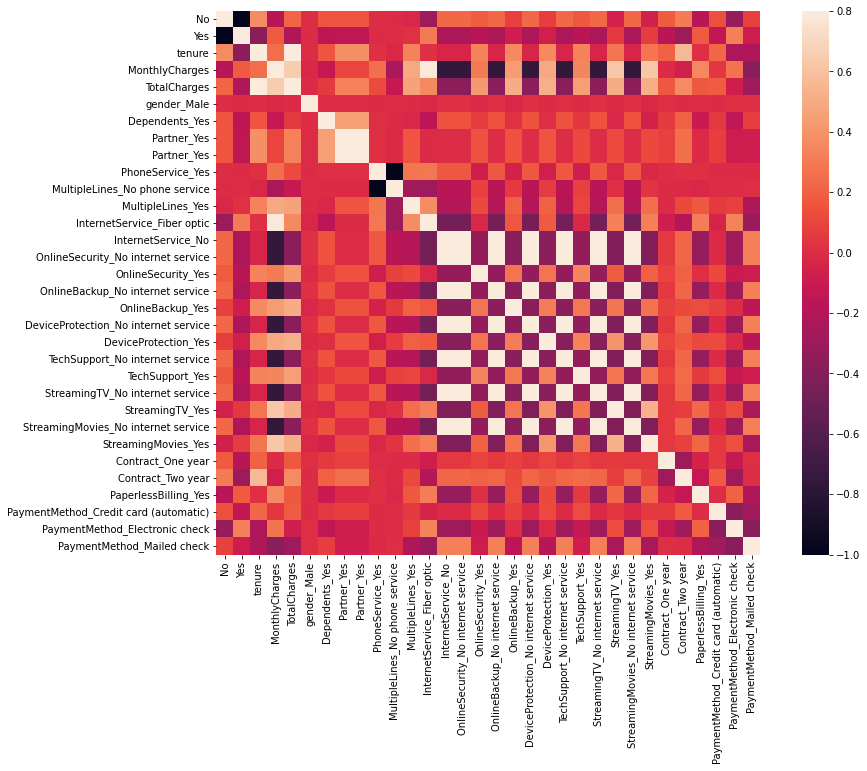

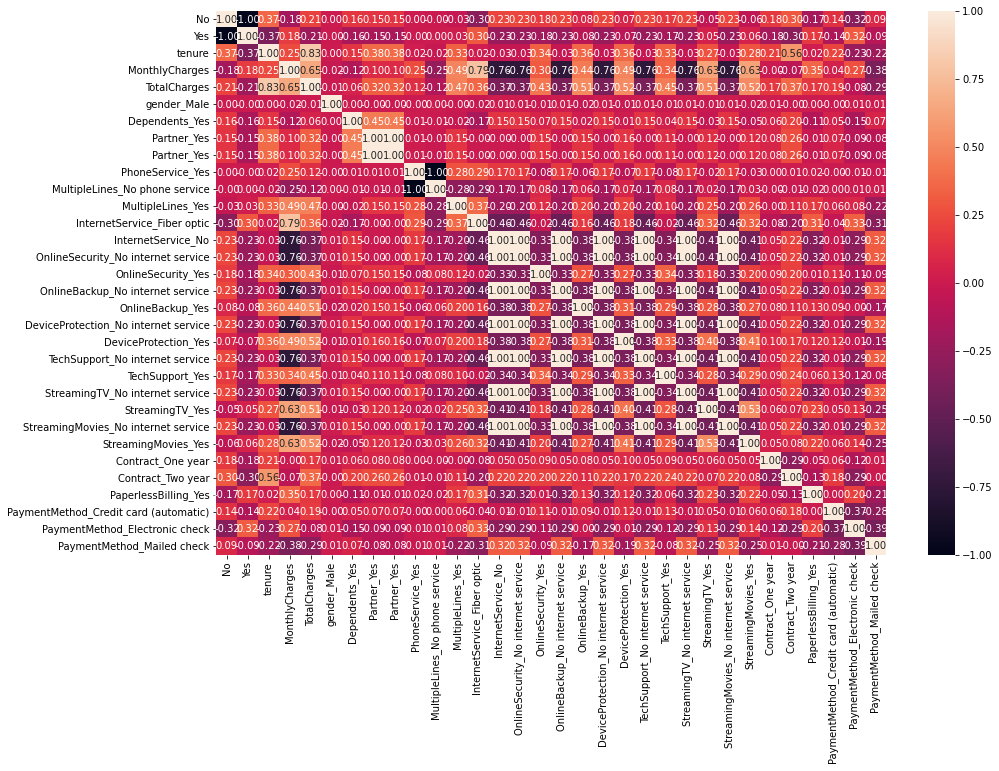

In [ ]:
# Heatmap Correlation Matrix

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr.corr(), vmax=.8, square=True);

plt.figure(figsize=(15,10))
sns.heatmap(corr.corr(), annot=True, fmt='.2f')
plt.show()

In [ ]:
# To find the correlation among the columns using pearson method
corr.corr(method ='pearson')

,No,Yes,tenure,MonthlyCharges,TotalCharges,gender_Male,Dependents_Yes,Partner_Yes,Partner_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
No,1.000000,-1.000000,0.366081,-0.181224,0.212805,0.003542,0.157744,0.153822,0.153822,0.004473,...,0.227424,-0.053431,0.227424,-0.062311,0.177376,0.301879,-0.174758,0.137171,-0.319084,0.089622
Yes,-1.000000,1.000000,-0.366081,0.181224,-0.212805,-0.003542,-0.157744,-0.153822,-0.153822,-0.004473,...,-0.227424,0.053431,-0.227424,0.062311,-0.177376,-0.301879,0.174758,-0.137171,0.319084,-0.089622
tenure,0.366081,-0.366081,1.000000,0.246271,0.826902,0.001466,0.153971,0.381147,0.381147,0.018648,...,-0.030419,0.274640,-0.030419,0.283598,0.205336,0.563158,0.017095,0.224792,-0.228581,-0.216095
MonthlyCharges,-0.181224,0.181224,0.246271,1.000000,0.650814,-0.021409,-0.122384,0.097129,0.097129,0.254297,...,-0.757322,0.626260,-0.757322,0.626304,-0.003323,-0.065475,0.353402,0.044266,0.266304,-0.376308
TotalCharges,0.212805,-0.212805,0.826902,0.650814,1.000000,-0.007002,0.055644,0.322268,0.322268,0.118677,...,-0.368607,0.511198,-0.368607,0.516800,0.167828,0.368505,0.169423,0.187039,-0.077672,-0.287254
gender_Male,0.003542,-0.003542,0.001466,-0.021409,-0.007002,1.000000,0.004150,-0.000370,-0.000370,-0.001952,...,0.014071,-0.014463,0.014071,-0.020953,0.011373,-0.003134,0.000237,-0.002287,0.009210,0.012105
Dependents_Yes,0.157744,-0.157744,0.153971,-0.122384,0.055644,0.004150,1.000000,0.447289,0.447289,0.006715,...,0.147409,-0.025082,0.147409,-0.054680,0.056897,0.200559,-0.105544,0.052775,-0.154819,0.069213
Partner_Yes,0.153822,-0.153822,0.381147,0.097129,0.322268,-0.000370,0.447289,1.000000,1.000000,0.014063,...,-0.001154,0.122003,-0.001154,0.117143,0.077070,0.255019,-0.012133,0.074783,-0.091978,-0.084513
Partner_Yes,0.153822,-0.153822,0.381147,0.097129,0.322268,-0.000370,0.447289,1.000000,1.000000,0.014063,...,-0.001154,0.122003,-0.001154,0.117143,0.077070,0.255019,-0.012133,0.074783,-0.091978,-0.084513
PhoneService_Yes,0.004473,-0.004473,0.018648,0.254297,0.118677,-0.001952,0.006715,0.014063,0.014063,1.000000,...,0.172038,-0.017274,0.172038,-0.027853,0.003775,0.014874,0.016507,-0.003088,-0.005025,-0.009004


Hasil korelasi yang didapatkan berdasarkan tabel korelasi dan menggunakan metode pearson, dapat dilihat bahwa kolom yang tidak mempunyai korelasi tinggi selain customer ID adalah gender, MultipleLines, PhoneService, StreamingTV dan StreamingMovies. Namun pada model ANN kali ini, kita akan menggunakan semua kolom tersebut kecuali Customer ID.

##Get Numerical Columns and Categorical Columns

In [ ]:
## Get Numerical Columns adn Categorical Columns

num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns : ', num_columns)
print('Categorical Columns : ', cat_columns)

Numerical Columns :  ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns :  ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


##Pipeline

In [ ]:
#Encoding target
labelencoder = LabelEncoder()
labelencoder.fit(y_train)

LabelEncoder()

In [ ]:
y_train_encoded = labelencoder.transform(y_train)
y_val_encoded = labelencoder.transform(y_val)
y_test_encoded = labelencoder.transform(y_test)

In [ ]:
# to dataframe
y_train_enc = pd.DataFrame(y_train_encoded, columns=['Churn'])
y_val_enc = pd.DataFrame(y_val_encoded, columns=['Churn'])
y_test_enc = pd.DataFrame(y_test_encoded, columns=['Churn'])

In [ ]:
y_train_enc

,Churn
0,0
1,0
2,0
3,0
4,1
...,...
5076,0
5077,1
5078,0
5079,0


In [ ]:
# Create A pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy='median'),
                             StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

In [ ]:
# Fit and transform
X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

In [ ]:
X_train.shape

(5081, 46)

In [ ]:
X_train

array([[-0.62533684, -1.49000281, -0.85534211, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.44758134,  1.6618793 ,  2.44867643, ...,  0.        ,
         0.        ,  0.        ],
       [-1.07243684, -0.32115905, -0.86193963, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.52887225,  0.41644464,  1.41433845, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.28499952, -0.15798713,  0.68740115, ...,  0.        ,
         0.        ,  0.        ],
       [-0.38146411, -0.31616399, -0.43912624, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_val.shape

(897, 46)

In [ ]:
X_test.shape

(1055, 46)

# 6 - Sequential API Baseline

In [ ]:
#Pipeline TensorFlow

# train data set
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train_encoded))
## Shuffle and slice train dataset.
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(64)

# validation data set
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val_encoded))
val_dataset = val_dataset.batch(64)

# test data set
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test_encoded)) 
test_dataset = test_dataset.batch(64) 

##6.1 - Model Definition

In [ ]:
# create Sequential API

model_sequential = Sequential()
model_sequential.add(Dense(46, activation='relu', input_shape=(46,))) # Hidden layer 1 #deklarasi input shape hanya sekali
model_sequential.add(Dense(1, activation='sigmoid')) #output layer


# compile
model_sequential.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])
model_sequential.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 46)                2162      
                                                                 
 dense_1 (Dense)             (None, 1)                 47        
                                                                 
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


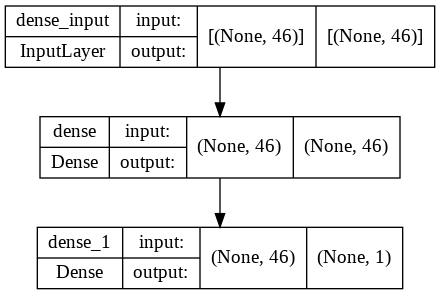

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential, show_shapes=True)

## 6.2 - Model Training

In [ ]:
# Train the Model

history_seq = model_sequential.fit(X_train, y_train_enc, epochs=30, validation_data=(X_val, y_val_enc), batch_size=10)

Epoch 1/30
509/509 [==============================] - 4s 5ms/step - loss: 0.4374 - accuracy: 0.7884 - val_loss: 0.4474 - val_accuracy: 0.7848
Epoch 2/30
509/509 [==============================] - 2s 5ms/step - loss: 0.4189 - accuracy: 0.8038 - val_loss: 0.4308 - val_accuracy: 0.7793
Epoch 3/30
509/509 [==============================] - 2s 4ms/step - loss: 0.4142 - accuracy: 0.8054 - val_loss: 0.4328 - val_accuracy: 0.7793
Epoch 4/30
509/509 [==============================] - 2s 5ms/step - loss: 0.4130 - accuracy: 0.8020 - val_loss: 0.4318 - val_accuracy: 0.7860
Epoch 5/30
509/509 [==============================] - 3s 5ms/step - loss: 0.4098 - accuracy: 0.8073 - val_loss: 0.4285 - val_accuracy: 0.7726
Epoch 6/30
509/509 [==============================] - 2s 5ms/step - loss: 0.4085 - accuracy: 0.8085 - val_loss: 0.4247 - val_accuracy: 0.7781
Epoch 7/30
509/509 [==============================] - 2s 4ms/step - loss: 0.4067 - accuracy: 0.8109 - val_loss: 0.4298 - val_accuracy: 0.7748
Epoch 

## 6.3 - Model Evaluation

In [ ]:
# create dataframe

history_seq_df = pd.DataFrame(history_seq.history)
history_seq_df

,loss,accuracy,val_loss,val_accuracy
0,0.437385,0.788427,0.447371,0.784838
1,0.418918,0.803779,0.430793,0.779264
2,0.414185,0.805353,0.432817,0.779264
3,0.412974,0.802007,0.431825,0.785953
4,0.409753,0.807321,0.428481,0.772575
5,0.408460,0.808502,0.424680,0.778149
6,0.406671,0.810864,0.429820,0.774805
7,0.404986,0.813029,0.429180,0.777035
8,0.403348,0.811258,0.424667,0.785953
9,0.402818,0.809683,0.430035,0.782609


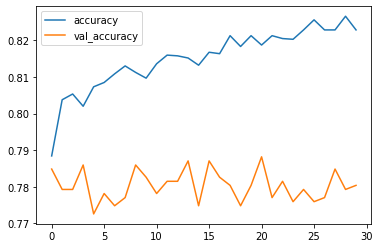

In [ ]:
# Plot between Accuracy and val_accuracy

history_seq_df[['accuracy','val_accuracy']].plot()

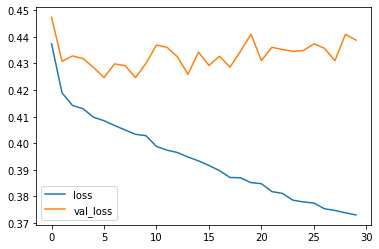

In [ ]:
# Plot between loss and val_loss

history_seq_df[['loss','val_loss']].plot()

In [ ]:
# Model Evaluation using Classification Report

y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)
y_pred_seq

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# calssification report
y_pred_seq = model_sequential.predict(X_test)
y_pred_seq = np.where(y_pred_seq >= 0.5, 1, 0)

y_pred_seq

print(classification_report(y_test_encoded, y_pred_seq))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       785
           1       0.60      0.58      0.59       270

    accuracy                           0.80      1055
   macro avg       0.73      0.72      0.73      1055
weighted avg       0.79      0.80      0.79      1055



- Baseline model dengan arsitektur Sequential API yang digunakan hanya memiliki 1 hidden layer dengan 46 dense.
- Optimizer yang digunakan adalah Adam.
- Dari grafik akurasi terlihat bahwa akurasi data train baik, karena mengarah semakin ke atas,hal ini menunjukkan bahwa nilai akurasi semakin meningkat, namun akurasi pada data validasinya terlihat buruk karena grafiknya mendatar dan jarak grafik akurasi data train dan data val terdapat gap yang jauh, sehingga dapat dikatakan bahwa data **over-fit**.
- Dari grafik loss terlihat bahwa loss data train baik, karena grafiknya mengarah semakin ke bawah, hal ini menunjukan loss prediction semakin mengecil, namun tidak begitu baik untuk data validasinya karena grafik  cenderung mendatar. Jarak garis loss val dan loss train nya juga jauh sehingga dapat dikatakan model over-fit.
- Berdasarkan nilai Recall, terlihat bahwa model dapat memprediksi 58% dengan benar pada customer Churn, dan 42% customer terprediksi False Negative yaitu customer yang seharusnya Churn tetapi terprediksi tidak Churn.
- Nilai akurasi pada model ini adalah 80%.

# 7 - Sequential API using Improvement

## 7.1 - Model Definition

In [ ]:
# create Sequential API

model_sequential_2 = Sequential()
model_sequential_2.add(Dense(46, activation='relu', input_shape=(46,))) # Hidden layer 1 #deklarasi input shape hanya sekali
model_sequential_2.add(Dense(18, activation='relu'))  #hidden layer 2
model_sequential_2.add(tf.keras.layers.Dropout(rate=0.2)) #drop out layer 
model_sequential_2.add(Dense(9, activation='relu')) #hidden layer 3
model_sequential_2.add(tf.keras.layers.Dropout(rate=0.2)) #drop out layer
model_sequential_2.add(Dense(1, activation='sigmoid')) #output layer


# compile
model_sequential_2.compile(loss='binary_crossentropy',
                         optimizer='Nadam',
                         metrics=['accuracy'])
model_sequential_2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 46)                2162      
                                                                 
 dense_3 (Dense)             (None, 18)                846       
                                                                 
 dropout (Dropout)           (None, 18)                0         
                                                                 
 dense_4 (Dense)             (None, 9)                 171       
                                                                 
 dropout_1 (Dropout)         (None, 9)                 0         
                                                                 
 dense_5 (Dense)             (None, 1)                 10        
                                                                 
Total params: 3,189
Trainable params: 3,189
Non-traina

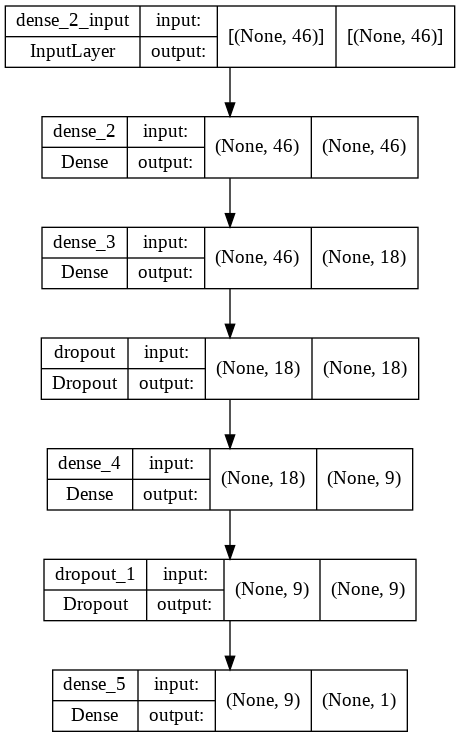

In [ ]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential_2, show_shapes=True)

##7.2 - Model Training

In [ ]:
# Train the Model

history_seq_2 = model_sequential_2.fit(X_train, y_train_enc, epochs=30, validation_data=(X_val, y_val_enc), batch_size=10)

Epoch 1/30
509/509 [==============================] - 3s 3ms/step - loss: 0.4754 - accuracy: 0.7520 - val_loss: 0.4303 - val_accuracy: 0.7860
Epoch 2/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4416 - accuracy: 0.7922 - val_loss: 0.4303 - val_accuracy: 0.7915
Epoch 3/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4305 - accuracy: 0.7951 - val_loss: 0.4324 - val_accuracy: 0.7826
Epoch 4/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4281 - accuracy: 0.8010 - val_loss: 0.4295 - val_accuracy: 0.7793
Epoch 5/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4227 - accuracy: 0.8052 - val_loss: 0.4303 - val_accuracy: 0.7826
Epoch 6/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4209 - accuracy: 0.7985 - val_loss: 0.4320 - val_accuracy: 0.7938
Epoch 7/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4235 - accuracy: 0.8057 - val_loss: 0.4305 - val_accuracy: 0.7826
Epoch 

##7.3 - Model Evaluation

In [ ]:
# create dataframe

history_seq_2df = pd.DataFrame(history_seq_2.history)
history_seq_2df

,loss,accuracy,val_loss,val_accuracy
0,0.475394,0.752017,0.430287,0.785953
1,0.441623,0.792167,0.430279,0.791527
2,0.430520,0.795119,0.432394,0.782609
3,0.428146,0.801023,0.429451,0.779264
4,0.422737,0.805156,0.430282,0.782609
5,0.420938,0.798465,0.432032,0.793757
6,0.423505,0.805747,0.430527,0.782609
7,0.415919,0.809290,0.434050,0.784838
8,0.415063,0.807715,0.431958,0.774805
9,0.415242,0.804763,0.444393,0.780379


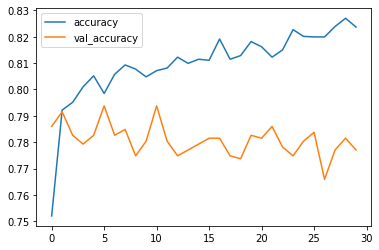

In [ ]:
# Plot between Accuracy and val_accuracy

history_seq_2df[['accuracy','val_accuracy']].plot()

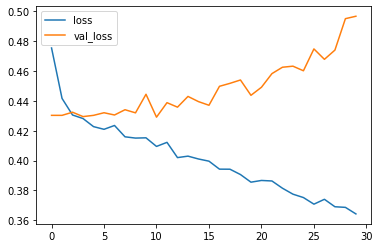

In [ ]:
# Plot between loss and val_loss

history_seq_2df[['loss','val_loss']].plot()

In [ ]:
# Model Evaluation using Classification Report

y_pred_seq2 = model_sequential_2.predict(X_test)
y_pred_seq2 = np.where(y_pred_seq >= 0.5, 1, 0)
y_pred_seq2

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
# calssification report
y_pred_seq2 = model_sequential_2.predict(X_test)
y_pred_seq2 = np.where(y_pred_seq2 >= 0.5, 1, 0)

y_pred_seq2

print(classification_report(y_test_encoded, y_pred_seq2))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86       785
           1       0.60      0.53      0.56       270

    accuracy                           0.79      1055
   macro avg       0.72      0.71      0.71      1055
weighted avg       0.78      0.79      0.79      1055



- Model arsitektur Sequential API dengan Improvement yang digunakan yaitu memiliki 3 hidden layer dengan masing-masing dense nya adalah 46, 18 dan 9. Model ini juga diberikan perintah drop out/menhapus dense dengan rate yang diberikan 0.2.
- Optimizer yang digunakan adalah Nadam.
- Berdasarkan grafik akurasi terlihat bahwa data train baik, karena grafiknya semakin ke atas, sedangkan untuk data validasinya terlihat buruk karena grafiknya cenderung mendatar dan agak kebawah. Model juga dapat dikatakan over-fit karena terdapat gap antara grafik data train dan data val yang cukup jauh.
- Berdasarkan grafik loss di atas terlihat bahwa loss pada data train baik karena grafik semakin menurun, sedangkan loss pada data val jelek karena grafik semakin ke atas. Data juga terlihat overfit karena terdapat perpotongan pada kedua garis train dan val.
- Berdasarkan nilai Racall pada classification report, terlihat bahwa model dapat memprediksi 53% customer Churn dengan benar, dan 47% sisanya False Negative yaitu salah memprediksi customer yang seharusnya Churn tetapi terprediksi tidak Churn.
- Nilai akurasi pada model ini adalah 79%.
- Model ini lebih jelek dari model Baselinnya.

# 8 - Functional API Baseline

## 8.1 - Model Definition

In [ ]:

input_layer = Input(shape=(46,))
hidden_layer = Dense(18, activation='relu')(input_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer)

model_functional = Model(inputs=input_layer, outputs=output_layer)

#Model Compile
model_functional.compile(loss='binary_crossentropy',
                         optimizer='Adam',
                         metrics=['accuracy'])

model_functional.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense_6 (Dense)             (None, 18)                846       
                                                                 
 dense_7 (Dense)             (None, 1)                 19        
                                                                 
Total params: 865
Trainable params: 865
Non-trainable params: 0
_________________________________________________________________


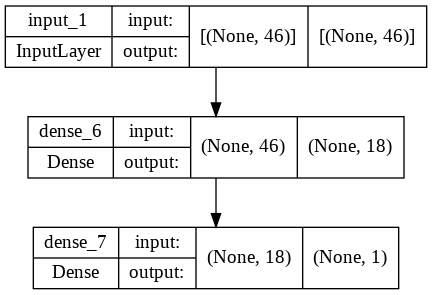

In [ ]:
# plot models

tf.keras.utils.plot_model(model_functional, show_shapes=True)

## 8.2 - Model Training

In [ ]:
history_functional = model_functional.fit(X_train, y_train_enc, epochs=30, validation_data=(X_val, y_val_enc), batch_size=10)

Epoch 1/30
509/509 [==============================] - 2s 2ms/step - loss: 0.4461 - accuracy: 0.7835 - val_loss: 0.4370 - val_accuracy: 0.7759
Epoch 2/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4215 - accuracy: 0.7993 - val_loss: 0.4343 - val_accuracy: 0.7770
Epoch 3/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4183 - accuracy: 0.8050 - val_loss: 0.4360 - val_accuracy: 0.7837
Epoch 4/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4161 - accuracy: 0.8026 - val_loss: 0.4321 - val_accuracy: 0.7893
Epoch 5/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4146 - accuracy: 0.8024 - val_loss: 0.4317 - val_accuracy: 0.7781
Epoch 6/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8006 - val_loss: 0.4281 - val_accuracy: 0.7837
Epoch 7/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.8050 - val_loss: 0.4340 - val_accuracy: 0.7781
Epoch 

## 8.3 - Model Evaluation

In [ ]:
# create dataframe

history_functional_df = pd.DataFrame(history_functional.history)
history_functional_df

,loss,accuracy,val_loss,val_accuracy
0,0.446076,0.783507,0.437017,0.775920
1,0.421501,0.799252,0.434332,0.777035
2,0.418314,0.804960,0.436016,0.783724
3,0.416051,0.802598,0.432145,0.789298
4,0.414634,0.802401,0.431706,0.778149
5,0.414198,0.800630,0.428117,0.783724
6,0.411326,0.804960,0.434035,0.778149
7,0.410096,0.806141,0.431935,0.782609
8,0.408754,0.805944,0.433668,0.783724
9,0.408565,0.807912,0.429782,0.778149


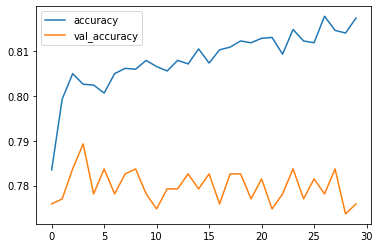

In [ ]:
# Plot between Accuracy and val_accuracy

history_functional_df[['accuracy','val_accuracy']].plot()

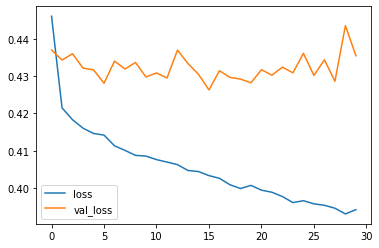

In [ ]:
# Plot between loss and val_loss

history_functional_df[['loss','val_loss']].plot()

In [ ]:
# Model Evaluation using Classification Report

y_pred_func = model_functional.predict(X_test)
y_pred_func = np.where(y_pred_func >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_func))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       785
           1       0.61      0.57      0.59       270

    accuracy                           0.80      1055
   macro avg       0.73      0.72      0.73      1055
weighted avg       0.79      0.80      0.80      1055



- Baseline model pada arsitektur Functional API model yang digunakan yaitu memiliki 1 hidden layer dengan jumlah dense 18.
- Optimizer yang dighunakan adalah Adam.
- Berdasarkan grafik akurasinya dapat dilihat bahwa grafik akurasi data train bagus, karena semakin ke atas, hal ini menunjukkan bahwa nilai akurasi semakin tinggi, namun grafik akurasi data valnya buruk karena semakin menurun. Hal ini juga menyebabkan model menjadi overfit karena adanya gap yang besar pada kedua grafik tersebut.
- Berdasarkan grafik loss terlihat bahwa loss data train baik karena semakin menurun, hal ini menunjukkan bahwa kesalah prediksi semakin menurun. Namun untuk data val grafiknya terlihat buruk karena garis cenderung mendatar dan exploding. Hal ini juga menyebabkan data menjadi overfit.
- Dari hasil nilai Recall kali ini didapat 57% model dapat memprediksi customer Churn dengan benar namun 43% lainnya terprediksi False Negative, yaitu nasabah yang seharusnya Churn tetapi terprediksi tidak Churn.
- Nilai akurasi pada model ini adalah 80%.

#9 - Functional API using Improvement

## 9.1 - Model Definition

In [ ]:

input_layer = Input(shape=(46,))
hidden_layer = Dense(20, activation='relu')(input_layer)
hidden_layer1 = Dense(8, activation='relu')(hidden_layer)
output_layer = Dense(1, activation='sigmoid')(hidden_layer1)

model_functional_2 = Model(inputs=input_layer, outputs=output_layer)

#Model Compile
model_functional_2.compile(loss='binary_crossentropy',
                         optimizer='rmsprop',
                         metrics=['accuracy'])

model_functional_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 46)]              0         
                                                                 
 dense_8 (Dense)             (None, 20)                940       
                                                                 
 dense_9 (Dense)             (None, 8)                 168       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,117
Trainable params: 1,117
Non-trainable params: 0
_________________________________________________________________


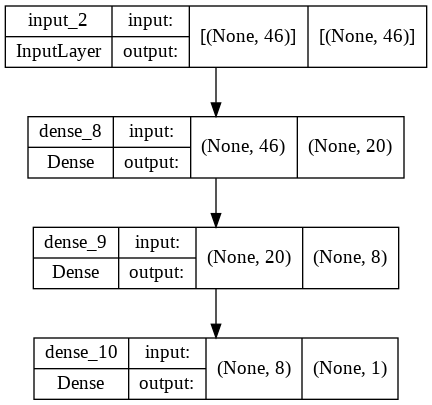

In [ ]:
# plot models

tf.keras.utils.plot_model(model_functional_2, show_shapes=True)

##9.2 - Model Training

In [ ]:
history_functional_2 = model_functional_2.fit(X_train, y_train_enc, epochs=30, validation_data=(X_val, y_val_enc), batch_size=10)

Epoch 1/30
509/509 [==============================] - 2s 3ms/step - loss: 0.4477 - accuracy: 0.7857 - val_loss: 0.4428 - val_accuracy: 0.7871
Epoch 2/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4245 - accuracy: 0.8010 - val_loss: 0.4287 - val_accuracy: 0.7804
Epoch 3/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4206 - accuracy: 0.8018 - val_loss: 0.4304 - val_accuracy: 0.7703
Epoch 4/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8050 - val_loss: 0.4252 - val_accuracy: 0.7915
Epoch 5/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4147 - accuracy: 0.8044 - val_loss: 0.4311 - val_accuracy: 0.7815
Epoch 6/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4136 - accuracy: 0.8040 - val_loss: 0.4216 - val_accuracy: 0.7837
Epoch 7/30
509/509 [==============================] - 1s 2ms/step - loss: 0.4113 - accuracy: 0.8057 - val_loss: 0.4201 - val_accuracy: 0.7882
Epoch 

## 9.3 - Model Evaluation

In [ ]:
# create dataframe

history_functional_2df = pd.DataFrame(history_functional_2.history)
history_functional_2df

,loss,accuracy,val_loss,val_accuracy
0,0.447746,0.785672,0.442823,0.787068
1,0.424455,0.801023,0.428695,0.780379
2,0.420605,0.801811,0.430354,0.770346
3,0.416933,0.804960,0.425247,0.791527
4,0.414737,0.804369,0.431130,0.781494
5,0.413566,0.803976,0.421645,0.783724
6,0.411272,0.805747,0.420055,0.788183
7,0.411495,0.803976,0.422240,0.785953
8,0.410258,0.805747,0.424942,0.795987
9,0.409372,0.807715,0.428843,0.791527


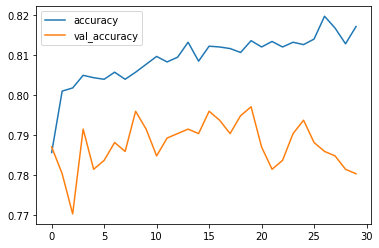

In [ ]:
# Plot between Accuracy and val_accuracy

history_functional_2df[['accuracy','val_accuracy']].plot()

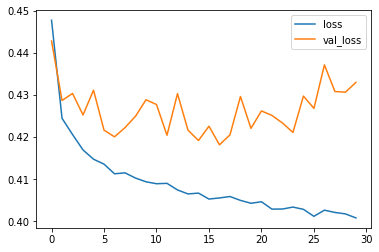

In [ ]:
# Plot between loss and val_loss

history_functional_2df[['loss','val_loss']].plot()

In [ ]:
# Model Evaluation using Classification Report

y_pred_func2 = model_functional_2.predict(X_test)
y_pred_func2 = np.where(y_pred_func2 >= 0.5, 1, 0)

print(classification_report(y_test_enc, y_pred_func2))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       785
           1       0.60      0.59      0.59       270

    accuracy                           0.79      1055
   macro avg       0.73      0.72      0.73      1055
weighted avg       0.79      0.79      0.79      1055



- Model Functional API dengan menggunakan Improvement yaitu 2  hidden layer dengan masing-masing Dense adalah 20 dan 8. Optimizer yang digunakan adalah **rmsprop**.
- Berdasarkan grafik akurasi di atas terlihat bahwa data train akurasinya baik karena grafik semakin keatas yaitu semakin meningkat nilai akurasinya, begitu juga dengan grafik akurasi data val yang semakin ke atas. Namun model masih overfit karena gap antara grafik data train dan data setnya cukup besar.
- Berdasarkan grafik loss data di atas terlihat bahwa garis data train semakin menurun, yaitu menunjukkan semakin kecil terjadinya loss prediction, namun grafik val lossnya terlihat sedikit meningkat dan exploding. Hal ini juga dapat diambil kesimpulan bahwa model overfit karena terdapat gap yang besar pada di antara kedua garis data train dan data val.
- Berdasarkan nilai Recall yang kita dapatkan kali ini, sebesar 59% model dapat memprediksi customer Churn dengan benar dan 41% lainnya terprediksi False Negative, yaitu customer yang sebenarnya Churn tetapi terprediksi tidak Churn.
- Akurasi pada model ini sebesar 79%.
- Model ini lebih baik daripada Baseline Modelnya. 

In [ ]:
# freeze model
model_functional_2.trainable = False

#9 - Model Saving

>Dengan melihat hasil evaluasi model, pilihlah model terbaik untuk disimpan. Model terbaik ini akan digunakan kembali dalam melakukan deployment di Heroku.

In [ ]:
# Save file untuk data inference

model_functional_2.save('churn_model')

! zip -r churn_model.zip churn_model
    
with open('final_pipeline.pkl', 'wb') as file_1:
    joblib.dump(final_pipeline, file_1)

with open('final_pipeline.pkl', 'rb') as file_2:
  final_pipeline = joblib.load(file_2)


  adding: churn_model/ (stored 0%)
  adding: churn_model/keras_metadata.pb (deflated 87%)
  adding: churn_model/variables/ (stored 0%)
  adding: churn_model/variables/variables.index (deflated 62%)
  adding: churn_model/variables/variables.data-00000-of-00001 (deflated 34%)
  adding: churn_model/saved_model.pb (deflated 87%)
  adding: churn_model/assets/ (stored 0%)


# 10 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

In [ ]:
data_inf

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,4289-DTDKW,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.10,Yes
1,3195-TQDZX,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No
2,1455-ESIQH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.10,Yes
3,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes
4,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No
5,3134-DSHVC,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No
6,4587-NUKOX,Female,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,79.10,246.50,Yes
7,7129-ACFOG,Female,0,No,No,5,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No
8,4730-AWNAU,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No
9,5512-IDZEI,Male,0,Yes,Yes,46,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1174.80,No


In [ ]:
data_inf.shape

(10, 21)

In [ ]:
data_inf.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data_inf_final = final_pipeline.transform(data_inf)

In [ ]:
data_inf_final.shape

(10, 46)

In [ ]:
#Memprediksi menggunakan random forest
y_pred_inf = model_functional.predict(data_inf_final)
y_pred_inf

array([[0.64425445],
       [0.33328402],
       [0.8537932 ],
       [0.601403  ],
       [0.01336524],
       [0.04416177],
       [0.5674295 ],
       [0.5484075 ],
       [0.08005619],
       [0.01412413]], dtype=float32)

In [ ]:
# Mengubah hasil prediksi menjadi Yes dan No, menggunakan threshold 0.5
y_pred_inf2 = []

for val in y_pred_inf:
    if val > 0.5:
      y_pred_inf2.append('Yes')
    else:
      y_pred_inf2.append('No')
y_pred_inf2[:10]

['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No']

In [ ]:
#Mengubah hasil prediksi ke dataframe
y_pred_inf2_df = pd.DataFrame(y_pred_inf2, columns=['Churn_Prediction'])

In [ ]:
y_pred_inf2_df

,Churn_Prediction
0,Yes
1,No
2,Yes
3,Yes
4,No
5,No
6,Yes
7,Yes
8,No
9,No


In [ ]:
# Menggabungkan hasil prediksi ke dalam data inference
data = pd.concat([data_inf, y_pred_inf2_df], axis = 1)
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_Prediction
0,4289-DTDKW,Male,0,Yes,No,40,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,101.30,4113.10,Yes,Yes
1,3195-TQDZX,Male,0,No,No,3,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,20.25,61.45,No,No
2,1455-ESIQH,Male,0,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,89.10,89.10,Yes,Yes
3,0388-EOPEX,Female,0,Yes,No,2,Yes,No,Fiber optic,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,74.40,139.40,Yes,Yes
4,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,Yes,...,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.20,No,No
5,3134-DSHVC,Female,0,No,No,63,Yes,Yes,Fiber optic,Yes,...,No,Yes,No,Two year,No,Credit card (automatic),98.00,6218.45,No,No
6,4587-NUKOX,Female,0,No,No,3,Yes,No,Fiber optic,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,79.10,246.50,Yes,Yes
7,7129-ACFOG,Female,0,No,No,5,Yes,Yes,DSL,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,53.80,283.95,No,Yes
8,4730-AWNAU,Male,0,Yes,Yes,36,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,One year,No,Credit card (automatic),60.70,2234.55,No,No
9,5512-IDZEI,Male,0,Yes,Yes,46,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,One year,No,Electronic check,24.90,1174.80,No,No


In [ ]:
# Membandingkan data aktual dengan data prediksi.
data[['Churn','Churn_Prediction']]

,Churn,Churn_Prediction
0,Yes,Yes
1,No,No
2,Yes,Yes
3,Yes,Yes
4,No,No
5,No,No
6,Yes,Yes
7,No,Yes
8,No,No
9,No,No


# 11 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

## 11.1 - Kesimpulan Model

- Model yang digunakan adalah Baseline model Sequential API, Sequential API dengan Improvement, Functional API Baseline dan Functional API dengan Improvement.
- Berikut adalah masing-masing Recall Score dan Accuracy Score yang diperoleh oleh keempat model: 
    - Sequential API Baseline : Recall Score 58%, Accuracy Score 80%
    - Sequential API using Improvement : Recall Score 53%, Accuracy Score 79%
    - Functional API Baseline : Recall Score 57%, Accuracy Score 80%
    - Functional API using Improvement : Recall Score 59%, Accuracy Score 79%


- Hasil terbaik yang didaptkan adalah dari model **Functional API** **dengan Improvement**, karena nilai Recall yang diperoleh paling tinggi dibandingkan model lainnya, yaitu sebesar **59%.**
- Hal ini menunjukkan bahwa model dapat memprediksi **59%** customer Churn dengan benar dan **41%** customer terprediksi False Negative, yaitu Customer yang seharusnya Churn tetapi terprediksi tidak Churn.
- Metrics yang digunakan adalah **Recall** karena dapat melihat seberapa besar customer Churn yang salah terprediksi, karena hal ini dapat menyebabkan kerugian pada perusahaan jika terdapat customer yang sudah berhenti berlangganan namun justru masih dianggap berlangganan.
- Model Functional API dengan Improvement tersebut kemudian digunakan untuk memprediksi data Inference, dan didapatkan hasil bahwa model dapat memprediksi **9 data** dengan **benar**, dan hanya **1 data** saja yang terprediksi **salah**.

## 11.2 - Kesimpulan EDA

- Terdapat **1.869 (26.54%)** pelanggan churn dan **5.174 (73.46%)** pelanggan tidak churn.
- Jumlah gender female dan male hampir sama yaitu 50.48% male dan 49.52% female. Keduanya tidak berbeda signifikan terhadap Churn.
- Terdapat 16.21% Senior Citizen dan 83.79% bukan Senior Citizen, **Senior Citizen** lebih banyak melakukan Churn dibandingkan yang bukan Senior Citizen, karena dari histogram terlihat perbandingan jumlah Senior Citizen terhadap jumlah Churn tidak berbeda jauh. Sedangkan, pada yang bukan Senior Citizen, terdapat perbedaan yang signifikan dengan jumlah customer Churn.
- Jumlah customer yang memiliki Partner adalah sebesar 48.30% dan yang tidak memiliki partner sebesar 51.70%, customer yang **tidak memiliki partner** lebih banyak melakukan Churn, dibandingkan dengan customer yang memiliki partner.
- Jumlah customer yang memiliki Dependents adalah sebesar 29.96% dan yang tidak memiliki dependents sebesar 70.04%, customer yang **tidak memiliki dependents** lebih banyak melakukan Churn, dibandingkan dengan customer yang memiliki dependents.
- Jumlah customer yang memiliki PhoneService adalah sebesar 90.32% dan yang tidak memiliki PhoneService sebesar 9.68%, Customer yang **memiliki PhoneService** lebih banyak melakukan Churn, hal ini berbanding lurus dengan banyaknya jumlah customer yang memiliki PhoneService.
- Jumlah customer dengan MultipleLines adalah sebesar 42.18%, customer yang tidak memiliki MultipleLines sebesar 48.13% dan sebesar 9.68% tidak memiliki Phone Service. Karakteristik customer MultipleLines berbanding lurus dengan customer yang Churn, yaitu semakin banyak jumlah customer yang **tidak memiliki** **MultipleLines**, maka semakin banyak juga yang Churn dibandingkan dengan cutomer yang memiliki MultipleLines.
- Terdapat 43.96% customer menggunakan saluran fiber optic, 34.37% customer menggunakan DSL dan 21.67% tidak memiliki internet service, customer yang melakukan churn terbanyak adalah customer yang menggunakan **Fiber Optic **Internet Service dibandingkan dengan DSL dan tanpa internet service.
- Terdapat 49.67% customer tanpa Online Security, 28.67% customer dengan online security dan 21.67% customer tanpa internet service. Churn terbanyak dilakukan oleh customer **tanpa Online Security.**
- Sebesar 43.84% customer tidak memiliki online backup, 34.49% customer memiliki online backup dan 21.67% customer tanpa internet service. Churn terbanyak dilakukan oleh customer **tanpa Online Backup.**
- Sebesar 43.94% customer tanpa Device Protection, 34.39% customer dengan Device Protection dan 21.67% tanpa internet service. Berdasarkan histogram di atas, customer yang melakukan churn terbanyak adalah customer **tanpa Device Protection.**
- Sebesar 49.31% customer tidak memiliki Tech Support, 29.02% customer memiliki Tech Support dan 21.67% customer tanpa internet service. Churn terbanyak dilakukan oleh customer **tanpa Tech Support.**
- Sebesar 39.90% customer tidak berlangganan Streaming TV, 38.44% customer berlangganan Streaming TV dan 21.67% customer tidak berlangganan internet. Churn terbanyak dilakukan oleh customer yang **tidak berlangganan Streaming TV.**
- Sebesar 39.54% customer tidak berlangganan Streaming Movies, 38.79% customer berlangganan streaming movies dan 21.67% customer tidak memiliki internet service. Churn terbanyak dilakukan oleh customer yang **tidak berlangganan Streaming Movies.**
- Sebesar 55.02% customer berlangganan bulanan, 24.07% customer berlangganan 2 tahunan dan 20.91% customer berlangganan satu tahunan. Customer yang paling banyak melakukan churn adalah customer yang **berlangganan bulanan.**
- Sebanyak 59.22% customer berlangganan tanpa tagihan dalam kertas (Paperless Billing) dan 40.87% customer berlangganan dengan tagihan dalam kertas. Churn terbanyak dilakukan oleh customer yang berlangganan dengan **tagihan tanpa kertas**.
- Sebanyak 33.58% cusatomer membayar dengan Electronic Check, 22.89% customer membayar melalui Mailed Check, 21.92% customer membayar dengan Bank Transfer dan 21.61% membayar dengan Credit Card. Churn terbanyak dilakukan oleh customer dengan metode pembayaran **Electronic Check,** lalu yang kedua adalah Mailed Check, yang ketiga adalah bank transfer dan yang terakhir melalui credit card.